In [1]:
import matplotlib.pyplot as plt

In [2]:
# Datos
categories = ['corta', 'media', 'lejana']
metrics = ['top-1', 'top-3', 'top-5', 'top-10']

# Near
trajbert_near_values = [0.4439, 0.6343, 0.6752, 0.7249]
ann_near_values = [0.1869, 0.3925, 0.5134, 0.6799]

# Medium
trajbert_medium_values = [0.3761, 0.5781, 0.6181, 0.6750]
ann_medium_values = [0.1911, 0.3958, 0.5159, 0.6824]

# Far
trajbert_far_values = [0.3840, 0.5599, 0.5974, 0.6618]
ann_far_values = [0.1882, 0.3911, 0.5139, 0.6809]

values = {
    'corta': {
        'trajbert': trajbert_near_values,
        'ann': ann_near_values
    },
    'media': {
        'trajbert': trajbert_medium_values,
        'ann': ann_medium_values
    },
    'lejana': {
        'trajbert': trajbert_far_values,
        'ann': ann_far_values
    }
}

for category in categories:
    values[category]['trajbert'] += values[category]['trajbert'][:1]
    values[category]['ann'] += values[category]['ann'][:1]

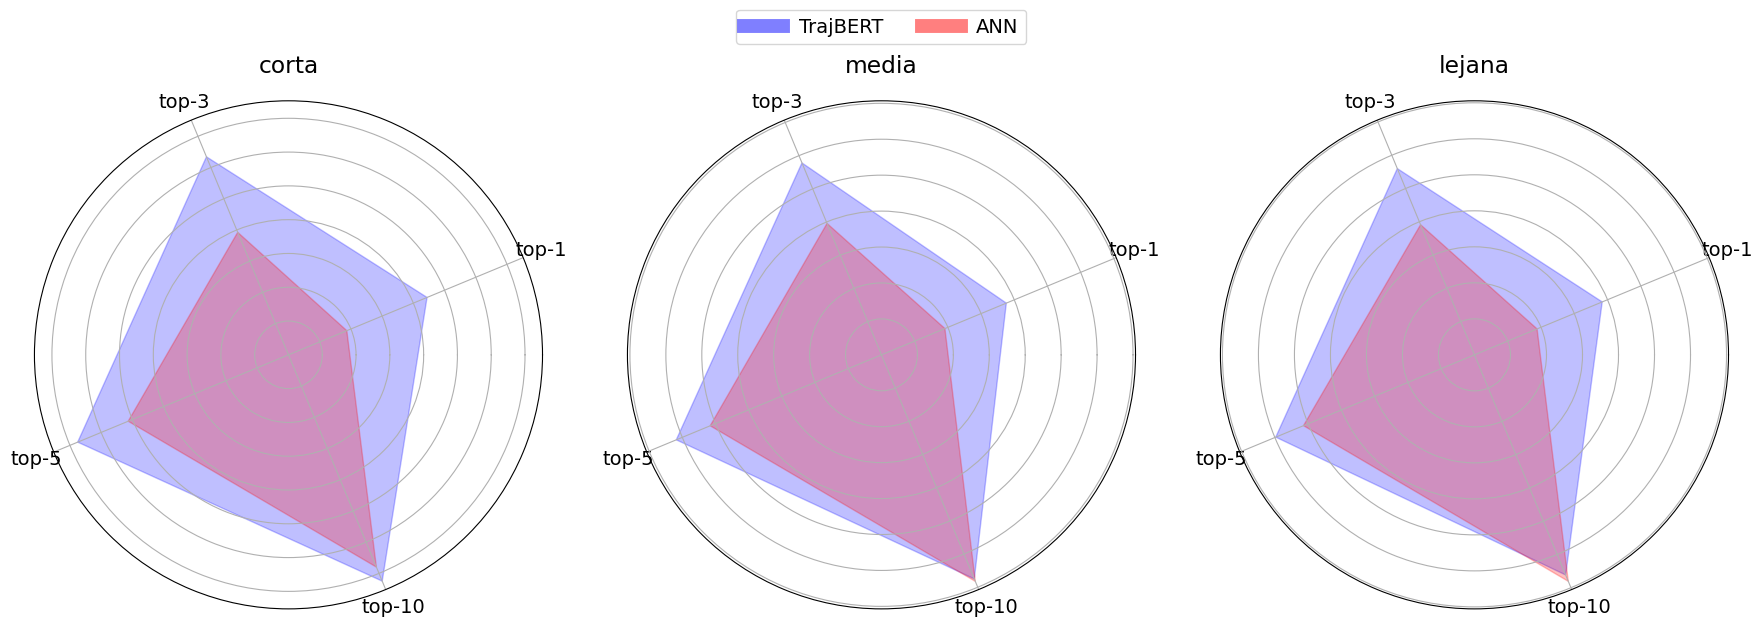

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Ángulos para cada métrica
angles = np.linspace(np.pi / 8, 2 * np.pi + np.pi / 8, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# Ajustar tamaño de fuente global
plt.rcParams.update({'font.size': 14})

# Crear una figura con 3 subgráficos en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))

# Dibujar la misma gráfica en cada subgráfico
for ax, category in zip(axes, categories):
    ax.fill(angles, values[category]['trajbert'], color='blue', alpha=0.25, label='TrajBERT')

    ax.fill(angles, values[category]['ann'], color='red', alpha=0.25, label='ANN')

    # ax.legend(loc='upper right')

    # Configurar etiquetas
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticklabels([])
    ax.set_title(category, pad=20)
    


# Agregar una leyenda global
handles = [
    plt.Line2D([0], [0], color='blue', alpha=0.5, lw=10, label='TrajBERT'),
    plt.Line2D([0], [0], color='red', alpha=0.5, lw=10, label='ANN')
]
# Agregar la leyenda solo en el primer gráfico para evitar redundancia
fig.legend(handles=handles, loc='upper center', fontsize=14, ncol=2, bbox_to_anchor=(0.5, 1.05))

# Ajustar el espacio para que la leyenda global no solape los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la figura con las 3 gráficas
plt.show()